# Day-57: Introduction to Neural Network

Today is Day 57, and we’re stepping into one of the most exciting and foundational topics in Deep Learning — Neural Networks.

We’ll start by understanding how biological neurons in our brain inspire artificial ones in machines, how a simple Perceptron works, and finally, how information flows through a Feedforward Neural Network.

## Topics Covered:

- Biological vs Artificial Neurons

- The Perceptron

- Feedforward Neural Networks

## Biological vs Artificial Neurons

In your brain, neurons receive signals through dendrites, process them in the cell body, and if the signal is strong enough, send it further through the axon to other neurons.

Similarly, in an Artificial Neural Network (ANN):

- Each neuron receives inputs (features).

- Multiplies them by weights.

- Adds a bias.

- Passes the result through an activation function to produce an output.

👉 `Analogy` :
Think of a neuron as a decision maker at a door. Each visitor (input) has a ticket (weight). The bouncer adds them up and decides if the total is strong enough to let them in (activation function).


The following table explains this with simple analogies.

| **Feature** | **Biological Neuron** | **Artificial Neuron (Perceptron)** | **Analogy** |
|:-------------|:----------------------|:-----------------------------------|:-------------|
| **Input** | Dendrites receive electrochemical signals. | Inputs (**x**) receive numerical data (features). | A person receiving multiple pieces of advice. |
| **Processing** | The Soma (cell body) sums incoming signals. | Summation function calculates the weighted sum:  $( z = (x \cdot w) + b)$ | Weighing each piece of advice by its importance. |
| **Importance** | Synaptic strength determines how easily signals pass between neurons. | Weights (**w**) represent importance of each input; Bias (**b**) shifts the activation. | How much you trust the person giving the advice. |
| **Output** | Axon hillock fires an Action Potential if signal strength exceeds a threshold. | Activation Function outputs 1 if the weighted sum exceeds a threshold, else 0. | Making a final decision (Yes/No). |


## The Perceptron: The Simplest Neuron

The Perceptron is the simplest form of an artificial neuron and was one of the first successful algorithms for training neural networks (developed by Frank Rosenblatt in 1957).

- `Definition`: A linear model used for binary classification. It computes a weighted sum of inputs and passes this sum through a step function to output a final decision (1 or 0).

- `Example`: The Ice Cream Decision
    - Input  $x$ :
        - $x_1$: Temperature (Hot=1,Cold=0)
        - $x_2$: Budget (Yes=1,No=0)

    - Weights $w$ :
        - $w_1$ =3 (Temperature is very important)
        - $w_2$ =1 (Budget is somewhat important)
    
    - Bias $b$ =−3 (A base reluctance to buy ice cream)
    - Calculation:
        - Weighted Sum $(z)$: $z=(x_1 ⋅3)+ (x_2⋅1)−3$
        - Activation (Decision): If $z$>0, output 1 (Buy Ice Cream); otherwise, output 0 (Don't Buy).



| **x₁ (Temp)** | **x₂ (Budget)** | **Weighted Sum (z)** | **Decision** |
|:---------------:|:----------------:|:--------------------:|:--------------:|
| 1 (Hot)  | 1 (Yes) | \( (1×3) + (1×1) - 3 = 1 \) |  1 (Buy!) |
| 0 (Cold) | 1 (Yes) | \( (0×3) + (1×1) - 3 = -2 \) | 0 (Don't Buy) |
| 1 (Hot)  | 0 (No)  | \( (1×3) + (0×1) - 3 = 0 \) |  0 (Don't Buy) |

### Code Example

In [1]:
import numpy as np

# Define perceptron weights and bias
w = np.array([3, 1])
b = -3

# Input data: [Temp, Budget]
X = np.array([
    [1, 1],  # Hot, Yes
    [0, 1],  # Cold, Yes
    [1, 0]   # Hot, No
])

def perceptron(x, w, b):
    z = np.dot(x, w) + b
    return 1 if z > 0 else 0, z

# Evaluate decisions
for x in X:
    decision, z = perceptron(x, w, b)
    print(f"Input {x} => Weighted Sum z = {z}, Decision = {decision} ({'Buy!' if decision else 'Don’t Buy'})")


Input [1 1] => Weighted Sum z = 1, Decision = 1 (Buy!)
Input [0 1] => Weighted Sum z = -2, Decision = 0 (Don’t Buy)
Input [1 0] => Weighted Sum z = 0, Decision = 0 (Don’t Buy)


## Feedforward Networks (Multi-Layer Perceptrons - MLPs)

When you stack multiple perceptrons in layers, you get a Feedforward Network. This is the most basic architecture of modern Deep Learning.

- `Structure`:
    - `Input Layer`: Receives the raw data (our features,$x$).

    - `Hidden Layer(s)`: Where the magic happens. Each neuron in a hidden layer performs its calculation and passes its output forward as input to the next layer. By chaining these decisions, the network learns highly complex, non-linear relationships.

    - `Output Layer`: Produces the final result (e.g., classifying a YouTube comment as Positive, Negative, or Neutral).

-- `"Feedforward"`: The data flows strictly from the input layer, through the hidden layers, and to the output layer, without looping back. It's a one-way street of computation.

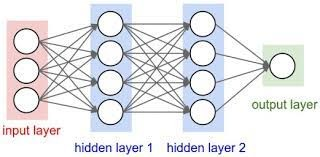

## Code Example: Building a Simple Feedforward Neural Network

Let’s quickly build a small neural network in Python using TensorFlow / Keras for sentiment classification of YouTube comments.

In [6]:
# Clean any broken installs
! pip uninstall -y numpy

# Update build tools
! pip install --upgrade pip setuptools wheel

# Install a 3.11-compatible NumPy
# Safe pick if you also plan to use TensorFlow 2.15 (needs numpy < 2.0):
# ! pip install "numpy==1.26.4"

# (Alternative latest stable if NOT using TF 2.15/older):
! pip install numpy

Found existing installation: numpy 2.3.3
Uninstalling numpy-2.3.3:
  Successfully uninstalled numpy-2.3.3
  Using cached numpy-2.3.3-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.3.3-cp311-cp311-win_amd64.whl (13.1 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.3.3 which is incompatible.
numba 0.61.2 requires numpy<2.3,>=1.24, but you have numpy 2.3.3 which is incompatible.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.3.3 which is incompatible.


In [8]:
! pip install tensorflow keras

In [1]:
# Day 57 - Neural Network Basics

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import kagglehub
from kagglehub import KaggleDatasetAdapter


# Download latest version
file_path = kagglehub.dataset_download("atifaliak/youtube-comments-dataset")

print("Path to dataset files:", file_path)
# Load the latest version
df = pd.read_csv(file_path + "\YoutubeCommentsDataSet.csv")
print("First 5 records:", df.head())

# Basic info
print("Dataset Info:")
print(df.info())
print("Missing values in each column:")
print(df.isnull().sum()) # Check for missing values
# Drop rows with missing values in 'Comment' or 'Sentiment'
df.dropna(subset=['Comment', 'Sentiment'], inplace=True)
print("After dropping missing values, dataset shape:", df.shape)

# Preprocessing
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Comment']).toarray()
y = pd.get_dummies(df['Sentiment']).values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simple Feedforward Neural Network
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}")


c:\Users\amey9\Documents\GitHub\DataScience-100-Days-of-Data-Science\.venv\Lib\site-packages\sklearn\utils\_param_validation.py:14: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.3)
  from scipy.sparse import csr_matrix, issparse
c:\Users\amey9\Documents\GitHub\DataScience-100-Days-of-Data-Science\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\amey9\.cache\kagglehub\datasets\atifaliak\youtube-comments-dataset\versions\1
First 5 records:                                              Comment Sentiment
0  lets not forget that apple pay in 2014 require...   neutral
1  here in nz 50 of retailers don’t even have con...  negative
2  i will forever acknowledge this channel with t...  positive
3  whenever i go to a place that doesn’t take app...  negative
4  apple pay is so convenient secure and easy to ...  positive
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18408 entries, 0 to 18407
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    18364 non-null  object
 1   Sentiment  18408 non-null  object
dtypes: object(2)
memory usage: 287.8+ KB
None
Missing values in each column:
Comment      44
Sentiment     0
dtype: int64
After dropping missing values, dataset shape: (18364, 2)


c:\Users\amey9\Documents\GitHub\DataScience-100-Days-of-Data-Science\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 648,579 (2.47 MB)

 Trainable params: 648,579 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
460/460 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7097 - loss: 0.6634 - val_accuracy: 0.7536 - val_loss: 0.5611
Epoch 2/5
460/460 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8381 - loss: 0.4051 - val_accuracy: 0.7571 - val_loss: 0.5805
Epoch 3/5
460/460 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9082 - loss: 0.2517 - val_accuracy: 0.7493 - val_loss: 0.7020
Epoch 4/5
460/460 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9615 - loss: 0.1223 - val_accuracy: 0.7375 - val_loss: 0.9095
Epoch 5/5
460/460 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9843 - loss: 0.0524 - val_accuracy: 0.7444 - val_loss: 1.0978
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7444 - loss: 1.0978
Test Accuracy: 0.74


## Summary of Day 57

Today, you started your Deep Learning journey by dissecting the fundamental unit: the neuron. You learned the parallels between biological and artificial neurons, understood the math behind the Perceptron—the simplest model using weighted sums and a step function—and saw how chaining these units creates a Feedforward Network. The Python code example demonstrated how a Perceptron can be trained to solve a basic logical problem like the AND gate.

## What's Next (Day 58)

The simple step function used in the Perceptron has limitations (it can only classify linearly separable data). To build true Deep Learning models, we need smoother, non-linear functions. Tomorrow, on Day 58, we will study Activation Functions such as ReLU, Sigmoid, Tanh, and Softmax, and discover why and when to use each one to enable complex pattern recognition.